<a href="https://colab.research.google.com/github/EphiWalker/brfss_health/blob/main/brfss_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BRFSS Health Dataset Analysis & Visualization

The Behavioral Risk Factor Surveilance System(BRFSS) Health Dataset is constructed annually following a survey of 350,000 people in the united state. It aims to recognize risk factors in the population as well as emerging health trends. Their website can be found [here](https://www.cdc.gov/brfss/).

Let's start by setting up our environment and importing the dataset we'll be working with.

In [55]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns #we'll be using seaborn for appealing visuals

df_url = 'https://raw.githubusercontent.com/akmand/datasets/master/openintro/brfss_2000.csv'
url_content = requests.get(df_url, verify=False).content
cdc = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

##Datsaset Details

Taking initial peeks into our data before diving deep.

In [3]:
cdc.shape

(20000, 9)

In [4]:
cdc.sample(10, random_state=999)

,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth
6743,1,1,0,71,170,170,23,m,very good
19360,1,0,1,64,120,117,45,f,very good
8104,1,1,1,70,192,170,64,m,good
8535,1,1,1,64,165,140,67,f,excellent
8275,1,1,0,69,130,140,69,m,very good
3511,0,1,0,63,128,128,37,f,very good
1521,1,1,0,68,176,135,37,f,good
976,0,1,1,64,150,125,43,f,fair
14484,1,1,1,68,185,185,78,m,good
3591,1,1,0,71,165,175,34,m,fair


Our dataset has 9 features and 20,000 cases.
Randomly sampling 10 cases, we can see what our 9 features are. Note that we've some features with numeric values and some others with text.

We can also sample the first or last five cases for further peek into our data and get a feel of what it looks like.

In [5]:
cdc.head()

,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth
0,0,1,0,70,175,175,77,m,good
1,0,1,1,64,125,115,33,f,good
2,1,1,1,60,105,105,49,f,good
3,1,1,0,66,132,124,42,f,good
4,0,1,0,61,150,130,55,f,very good


In [6]:
cdc.tail()

,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth
19995,1,1,0,66,215,140,23,f,good
19996,0,1,0,73,200,185,35,m,excellent
19997,0,1,0,65,216,150,57,f,poor
19998,1,1,0,67,165,165,81,f,good
19999,1,1,1,69,170,165,83,m,good


We also note that the first three features seem to have numeric values alternating between 0 and 1, suggesting that these could be categorical features. We'll explore this later; now, let's take a closer look at our features and what data types they store.

In [7]:
cdc.columns.values

array(['exerany', 'hlthplan', 'smoke100', 'height', 'weight', 'wtdesire',
       'age', 'gender', 'genhlth'], dtype=object)

In [8]:
cdc.dtypes

exerany      int64
hlthplan     int64
smoke100     int64
height       int64
weight       int64
wtdesire     int64
age          int64
gender      object
genhlth     object
dtype: object

We see that only two of our features (gender & genhlth) store string values while the rest have numerical data.

We can also take a closer look at how our 20,000 cases are distributed among our variables (features) by taking summary statistics of the whole dataset.

In [9]:
cdc.describe()

,exerany,hlthplan,smoke100,height,weight,wtdesire,age
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000
mean,0.745700,0.873800,0.472050,67.182900,169.68295,155.093850,45.068250
std,0.435478,0.332083,0.499231,4.125954,40.08097,32.013306,17.192689
min,0.000000,0.000000,0.000000,48.000000,68.00000,68.000000,18.000000
25%,0.000000,1.000000,0.000000,64.000000,140.00000,130.000000,31.000000
50%,1.000000,1.000000,0.000000,67.000000,165.00000,150.000000,43.000000
75%,1.000000,1.000000,1.000000,70.000000,190.00000,175.000000,57.000000
max,1.000000,1.000000,1.000000,93.000000,500.00000,680.000000,99.000000


Here, we can see sumary statistics for our seven(7) numerical features. Let's take an even closer look at one of our features, height.

In [10]:
cdc['height'].describe()

count    20000.000000
mean        67.182900
std          4.125954
min         48.000000
25%         64.000000
50%         67.000000
75%         70.000000
max         93.000000
Name: height, dtype: float64

We can see here, for example, that the mean and median (50%) are very close to one another, which prossibly means our data doesn't have that many outliers in the 'height' variable. When needed, we can calculate the interquartile range(IQR) by subtracting our Q1(25%) from our Q3(75%).

In [11]:
cdc['height'].quantile(0.75) - cdc['height'].quantile(0.25)

6.0

It's now time to look at our suspected categorical features one by one and check our guess is correct. We can check how many unique values a given feature has and also see if it contains any values decimal places.

In [12]:
cdc['smoke100'].value_counts()

0    10559
1     9441
Name: smoke100, dtype: int64

We see our 'smoke100' feature only has two values for all of our cases: 0 and 1. This means 'smoke100' is categorical, even though it takes integer values, namely 0 and 1, to represent two categories. Now, let's take a look at the 'exerany' and 'hlthplan' fetures

In [13]:
cdc['exerany'].value_counts()

1    14914
0     5086
Name: exerany, dtype: int64

In [14]:
cdc['hlthplan'].value_counts()

1    17476
0     2524
Name: hlthplan, dtype: int64

Let's also take a look at what values our 'gender' and 'genhlth' features contain, though we already know they're categorical based on their data types.

In [15]:
cdc['gender'].value_counts()

f    10431
m     9569
Name: gender, dtype: int64

In [16]:
cdc['genhlth'].value_counts()

very good    6972
good         5675
excellent    4657
fair         2019
poor          677
Name: genhlth, dtype: int64

Based on our work so far, we can classify our variables into categorical and numeric.


**Categorical** - 'exerany', 'hlthplan', 'smoke100', 'gender', 'genhlth'

**Numeric** - 'height', 'weight', 'wtdesire', 'age'

Looking at the description of our dataset from its source confirms our classification. Additionally, below is what each of our variables describes.


Feature | Desription                                               | Values
--------|----------------------------------------------------------|-------
exerany |has the person exercised at least once in the past month?|0:no, 1:yes
hlthplan|does the respondent have some form of health coverage?   |0:no, 1:yes
smoke100|has the person smoked at least 100 cigarettes in their life time?|0:no, 1:yes
height  |the height of the respondent                             |inches
weight  |the weight of the person                                 |pounds
wtdesire|desired weight of the person                             |pounds
age     |age of the person                                        |years
gender  |the respondent's gender                                  |f:female, m:male
genhlth |how does the person rate about her/his overall health?   |poor, fair, good, very good, excellent

##Data Cleaning & Preprocessing

The subset of the BRFSS Health dataset that we're using is pretty much clean and I'll focus mainly on visualizing the dataset for this project. But, let's walk through the data cleaning steps. We'll mainly be checking for the following:

* Duplicate rows
* Missing values
* White spaces


In [23]:
cdc[cdc.duplicated()==True]

,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,genhlth
529,1,1,0,67,140,130,43,f,very good
530,1,1,0,74,185,185,31,m,excellent
2239,1,1,0,62,130,120,41,f,very good
2436,1,1,0,67,120,120,32,f,very good
2713,1,1,1,73,180,180,75,m,excellent
...,...,...,...,...,...,...,...,...,...
19482,0,1,1,72,200,190,37,m,very good
19569,0,1,0,66,135,130,37,f,good
19613,1,1,0,67,220,150,38,f,very good
19851,1,1,1,68,150,150,26,m,very good


We can see our duplicate rows above and notice that we've 130 duplicate rows. We can also get the number of duplicate rows without needing to look at the table of rows.

In [24]:
cdc.duplicated().sum()

130

If our dataset couldnot have duplicate rows, we'd remove them at this step. In this case, it is entirely possible that these duplicates were caused because of real data coincidentally happened to be identical so we'll leave them as they are.

In [31]:
cdc.isnull().sum()

exerany     0
hlthplan    0
smoke100    0
height      0
weight      0
wtdesire    0
age         0
gender      0
genhlth     0
dtype: int64

Our data does not contain any missing values at any of the features. Next, let's print all the unique values of each column and see if there are white spaces among listed as unique values.

In [33]:
categorical_col = cdc.columns[cdc.dtypes==object].tolist()

for col in categorical_col:
  print('Unique values for: ' + col)
  print(cdc[col].unique())
  print('')

Unique values for: gender
['m' 'f']

Unique values for: genhlth
['good' 'very good' 'excellent' 'fair' 'poor']



Most of the values don't contain white spaces, except for the 'very good' value in our 'genhlth' feature, which could create problems during visualization or fitting prediction models. For the sake of uniformity, I'll get rid of the white space, and since the only white space character exists between two words, I'll insert an underscore in its place.

In [44]:
cdc['genhlth']=cdc['genhlth'].replace(' ', '_', regex=True)

In [45]:
cdc['genhlth'].value_counts()

very_good    6972
good         5675
excellent    4657
fair         2019
poor          677
Name: genhlth, dtype: int64

Before we move on to visualizing the data, let's look at some summary statistics for the categorical variables.

In [47]:
cdc.describe(include='object').T

,count,unique,top,freq
gender,20000,2,f,10431
genhlth,20000,5,very_good,6972


In [50]:
cdc['genhlth'].value_counts()

very_good    6972
good         5675
excellent    4657
fair         2019
poor          677
Name: genhlth, dtype: int64

Though the counts for each unique value provides some insight, it doesn't tell us what the proportion of each value is. To gain that insight, we'll normalize our unique values.

In [53]:
cdc['genhlth'].value_counts(normalize=True)

very_good    0.34860
good         0.28375
excellent    0.23285
fair         0.10095
poor         0.03385
Name: genhlth, dtype: float64

##Data Visualization

##Quantitative Data
* Box Plots
* Histograms

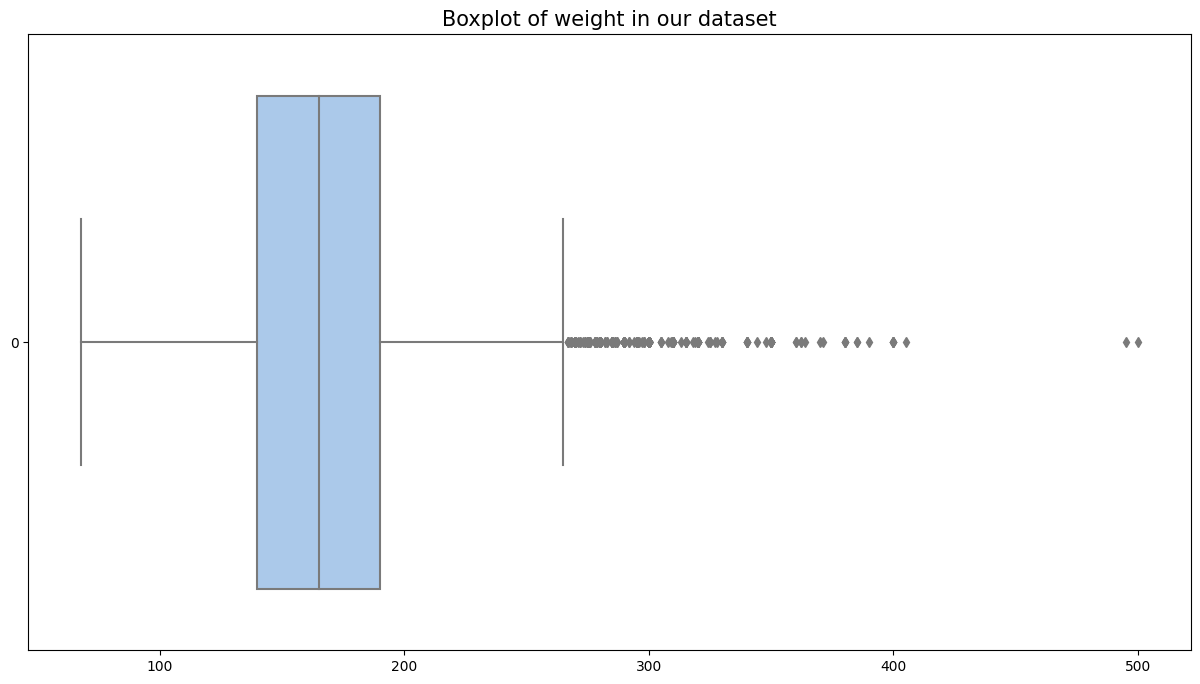

In [104]:
plt.figure(figsize=(15,8))
fig = sns.boxplot(cdc['weight'], orient='h', palette='pastel').set_title('Boxplot of weight in our dataset', fontsize=15)

We can deduce from the boxplot that the median is somewhere between 150 and 200. It's also apparent that we've some outliers on the right side, with none on the left.

Text(0.5, 1.0, 'Histogram of height')

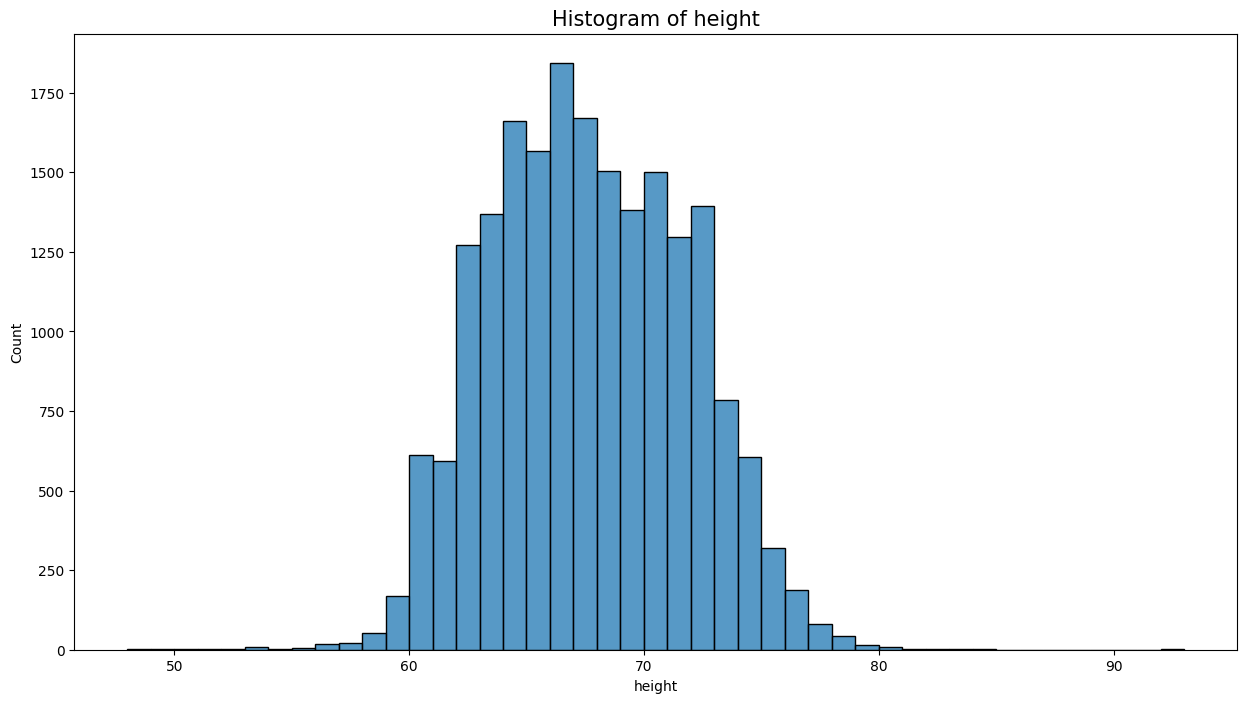

In [107]:
plt.figure(figsize=(15,8))
sns.histplot(cdc['height'], bins=45).set_title('Histogram of Height', fontsize=15)

Unlike our 'weight' variable we plotted in the boxplot, we can see in the historgram above that our 'height' variable has trailing values both in its left and right sides, accounting for people that are shorter or taller than the median respectively.

Text(0.5, 1.0, 'Histogram of age')

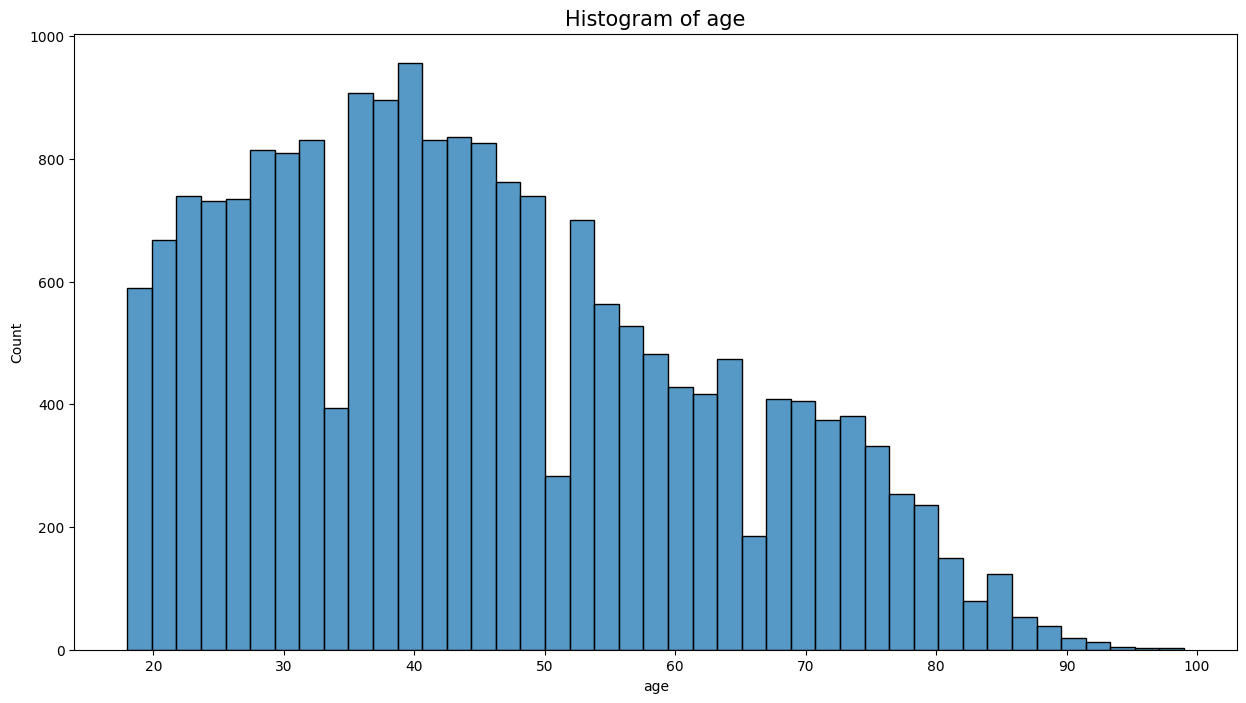

In [108]:
plt.figure(figsize=(15,8))
sns.histplot(cdc['age'], bins='auto').set_title('Histogram of Age', fontsize=15)

Here, we can see our 'age' variable starts somewhere just below 20 (perhaps 18?) and continues without any restriction until it starts trailing off in the end.

In [ ]:
cdc['smoke100'].value_counts().plot(kind = 'bar', color = 'turquoise',
                                    title = 'Bar plot of smoke100')
#plt.show()

In [ ]:
smoke = cdc['smoke100'].value_counts()
smoke.plot(kind='bar', color='turquoise',
           title='Bar plot of smoke100')

In [ ]:
cdc['height'].describe()

In [ ]:
70-64

In [ ]:
cdc['age'].describe()

In [ ]:
57-31

In [ ]:
cdc['gender'].value_counts(normalize = True)

In [ ]:
cdc['exerany'].value_counts(normalize=True)

1    0.7457
0    0.2543
Name: exerany, dtype: float64

In [ ]:
cdc.groupby('gender')['smoke100'].value_counts(normalize=True).unstack()

In [ ]:
cdc.groupby('gender')['genhlth'].value_counts(normalize=True).unstack()

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

gender_colors = lambda key:{'color':'lightcoral' if 'f' in key else 'lightblue'}

mosaic(cdc, ['gender', 'smoke100'], title='Mosaic plot of smoke100 and gender',
       properties = gender_colors, gap=0.02)

In [ ]:
cdc['height'].plot(kind='box', title = 'Boxplot of height', vert=False)

In [ ]:
cdc['height'].describe()

In [ ]:
cdc.boxplot(column='height', by='gender', vert=False)
plt.title('Boxplot of height by gender')
plt.suptitle('')

In [ ]:
bmi = (cdc['weight'] / (cdc['height']**2)*703)

In [ ]:
import seaborn as sns

sns.boxplot(x=cdc['genhlth'], y=bmi).set(xlabel='genhlth', ylabel='bmi',
                                         title = 'Boxplot of BMI by genhlth')

In [ ]:
cdc.columns

In [ ]:
sns.boxplot(x=cdc['exerany'], y=bmi).set(xlabel='exerany', ylabel='bmi',
                                         title = 'Box plot of exerany and bmi')

In [ ]:
cdc['age'].plot(kind='hist', color='springgreen', edgecolor='black',
                linewidth=1.2, title = 'Histogram of age')

In [ ]:
bmi.plot(kind='hist', color='slateblue', edgecolor='black',
         linewidth=1.2, title='Histogram of BMI')
plt.show()

bmi.plot(kind='hist', color='gold', edgecolor='black',linewidth=1.2,
         title='Histogram of BMI (with the bin size of 50)', bins=50)
plt.show()

In [ ]:
sns.scatterplot(x=cdc['weight'], y=cdc['wtdesire'])

In [ ]:
wdiff=cdc['wtdesire']-cdc['weight']

In [ ]:
wdiff

In [ ]:
wdiff.describe()

In [ ]:
cdc[wdiff==500]

In [ ]:
wdiff.plot(kind='hist', bins=100, color='cyan')

In [ ]:
wdiff.plot(kind='box', vert=False)

In [ ]:
wdiff[cdc['gender']=='m'].median()

In [ ]:
wdiff[cdc['gender']=='f'].median()

In [ ]:
sns.boxplot(x=cdc['gender'], y=wdiff).set(xlabel='gender', ylabel='wdiff',
                                          title='Boxplots by wdiff')

In [ ]:
mean_weight=cdc['weight'].mean()

In [ ]:
cdc['weight'].std()

In [ ]:
(abs(cdc['weight']-mean_weight)<=1).value_counts(normalize=True)

False    0.9525
True     0.0475
Name: weight, dtype: float64